This page covers illustration of Decision Tree using Gini Alogrithm.
Data set used is whether a passenger survived or not survived in Titanic. It is classification problem.



In [35]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  # this line confirms graphs dispalyed within the Jupyter notebook

UsageError: unrecognized arguments: # this line confirms graphs dispalyed within the Jupyter notebook


In [ ]:
#reading the data
data=pd.read_csv('data_decisiontree.csv')

In [ ]:
#print data first 5 rows
data.head() # in the surivived column 0 means passenger not surivived and 1 refers survived

In [ ]:
#get the shape of the data - this will fetch number of rows and columns
data.shape

In [36]:
#checking for nulls and blanks
check_null=data.isnull()
print(check_null.sum())

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [37]:
#to use a model using sklearn we have to define target variables and independant variables 
y=data['Survived']
X=data.drop(['Survived'],axis=1)

In [38]:
#importing train test_split to create validation set
from sklearn.model_selection import train_test_split


In [39]:
#creating the train and validation set, train set is 75%, test size set is 25% of the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=101, stratify=y, test_size=0.25)

In [40]:
#distribution with normalization in the training set
y_train.value_counts(normalize=True)

0    0.616766
1    0.383234
Name: Survived, dtype: float64

In [41]:
#distribution with normalization in the validation set is made similar using stratify=y
y_valid.value_counts(normalize=True)

0    0.61435
1    0.38565
Name: Survived, dtype: float64

In [42]:
#shape of the data set
X_valid.shape, y_valid.shape

((223, 24), (223,))

In [43]:
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier


In [44]:
#importing decision tree regression modeling
from sklearn.tree import DecisionTreeRegressor

In [45]:
#decision tree function formation
dt_model = DecisionTreeClassifier(random_state=10)

In [46]:
#fitting model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [47]:
#check training score
dt_model.score(X_train, y_train)

0.9880239520958084

In [48]:
#now check the validation set - validation accuracy is down
dt_model.score(X_valid, y_valid)

0.7533632286995515

In [49]:
# to predict if the passenger survived
dt_model.predict(X_valid)

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0], dtype=int64)

In [50]:
# 0.5 default threshold so we will trying changing threshold to see if accuracy can improve
dt_model.predict_proba(X_valid)
from sklearn.metrics import accuracy_score

In [51]:
y_pred = dt_model.predict_proba(X_valid)[:,1]

In [52]:
new_y=[]
for i in range(len(y_pred)):
    if y_pred[i]<0.9:
        new_y.append(0)
    else:
        new_y.append(1)

In [53]:
#fetch accuracy score
accuracy_score(y_valid, new_y)
#result has no impact even if threshold is changed
# if you increase threshold to 0.9 then accurancy is reduced 

0.7488789237668162

# changing Max Depth 

#we are going to use default parameters of the decision tree from above to see if changing the default parameters 
# can give better results
train_accuracy = []
validation_accuracy = []
for depth in range (1, 10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit (X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [54]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_accrcy':train_accuracy, 'valid_accrcy':validation_accuracy})
frame.head()

NameError: name 'train_accuracy' is not defined

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_accrcy'],marker='o', label="train_accrcy")
plt.plot(frame['max_depth'], frame['valid_accrcy'],marker='o', label="valid_accrcy")
plt.plot()
plt.xlabel('Tree Depth')
plt.ylabel('performance')
plt.legend(loc = 'upper left')


Here it can be seen with max depth of 1 validation accuracy is not performing but increase in depth improve the performance along with training accuracy. It continues to increase until depth=9 then drops again at 9. So we can safely assume that max_Depth=8 for our tree.
It is not tested right now for
* max_leaf_nodes
* min_samples_split
* min_samples_leaf

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [ ]:
#fitting the model
dt_model.fit(X_train, y_train)

In [ ]:
dt_model.score(X_train, y_train)

dt_model.score(X_valid, y_valid)

Now we can say that training and validation scores are close and in line with expectation. 

In [65]:
from sklearn import tree
import pydotplus

In [66]:
!pip install graphviz


In [67]:
#print the decision tree upto max_depth=2 but it can be changed to further. It will not affect the functioning of the tree. 
#Keeping filled=True so that majority nodes are filled.
decision_tree=tree.export_graphviz(dt_model, out_file='tree.dot', feature_names=X_train.columns, max_depth=5,filled=True)


In [68]:
from IPython.display import Image
import pydotplus
#graph=pydotplus.graph_from_dot_data(decision_tree)
!dot -Tpng  tree.dot -o tree.png


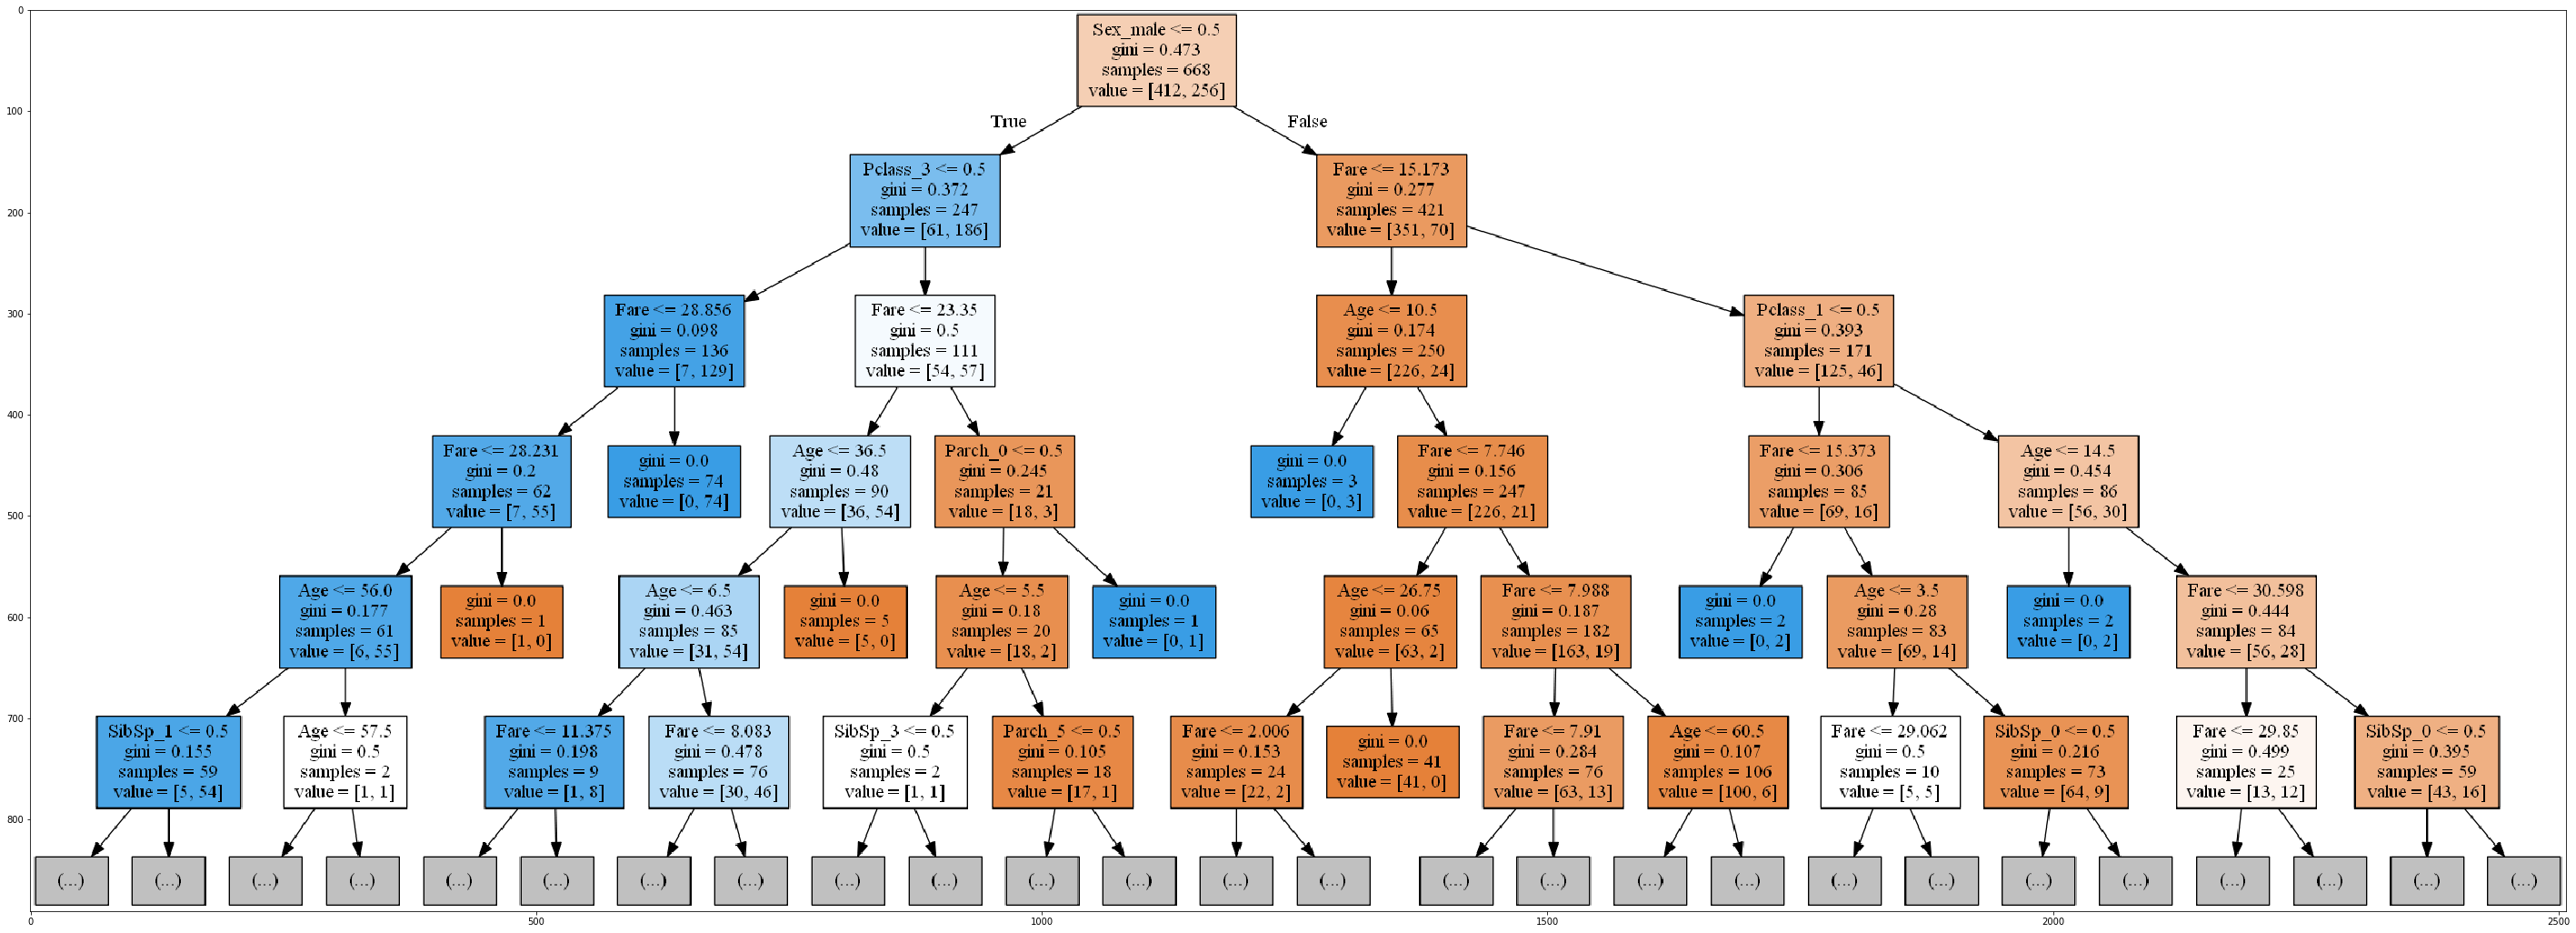

In [69]:
# this will show the graph from the current directory
image= plt.imread('tree.png')
plt.figure(figsize=(50,50))
plt.imshow(image)